In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.exceptions import ConvergenceWarning
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
import joblib
import warnings

In [ ]:
df = pd.read_csv("C:\\Users\\Talari Rishi\\Mini_project_Final_CLEANED\\digital-eye(ori).csv")

df.head()

,Name,Age,Sex,wearables,Duration,onlineplatforms,Nature,screenillumination,workingyears,hoursspentdailycurricular,...,freqquencyofcomplaints,Severityofcomplaints,RVIS,Ocularsymptomsobservedlately,Symptomsobservingatleasthalfofthetimes,frequencyofdryeyes,Schimers1Lefteye,Schimers1righteye,Schimers2Lefteye,Schimers2righteye
0,Hemanth,24,1,1,2.0,2.0,2.0,1.0,2.0,1.0,...,0,0,0,6.0,3.0,1,25,28,30,32
1,Syeda Afiya,22,2,1,2.0,1.0,2.0,2.0,1.0,1.0,...,1,1,1,13569.0,1345.0,2,14,16,19,20
2,Kranthi,23,1,5,2.0,2.0,2.0,3.0,3.0,4.0,...,1,2,1,135679.0,12345.0,1,8,6,9,8
3,Sk.M.A.Khadeer,23,1,1,2.0,2.0,2.0,1.0,1.0,1.0,...,1,1,1,135.0,23.0,1,13,14,15,14
4,B.Shravan kumar,27,1,3,2.0,2.0,1.0,1.0,1.0,1.0,...,0,0,0,7.0,23.0,3,34,32,35,35


In [8]:
df.tail()

,Name,Age,Sex,wearables,Duration,onlineplatforms,Nature,screenillumination,workingyears,hoursspentdailycurricular,...,freqquencyofcomplaints,Severityofcomplaints,RVIS,Ocularsymptomsobservedlately,Symptomsobservingatleasthalfofthetimes,frequencyofdryeyes,Schimers1Lefteye,Schimers1righteye,Schimers2Lefteye,Schimers2righteye
295,Rahul,27,1,3,NaN,2.0,2.0,3.0,1.0,1.0,...,0,0,0,1.0,45.0,2,23,26,29,30
296,Ganesh Nayak,27,1,1,2.0,1.0,2.0,3.0,1.0,1.0,...,0,0,0,29.0,3.0,2,26,22,27,25
297,Nitin Sharma,24,1,3,NaN,1.0,2.0,3.0,1.0,1.0,...,0,0,0,279.0,13.0,2,23,27,28,29
298,Mukul Saner,24,1,1,1.0,1.0,2.0,3.0,1.0,1.0,...,0,2,0,19.0,3.0,2,12,14,16,18
299,D.Kiran goud,24,1,3,NaN,2.0,2.0,2.0,1.0,NaN,...,1,0,0,139.0,23.0,2,16,19,19,21


In [9]:
df.nunique()

Name                                      295
Age                                        12
Sex                                         2
wearables                                   5
Duration                                    4
onlineplatforms                             5
Nature                                      4
screenillumination                          3
workingyears                                4
hoursspentdailycurricular                   4
hoursspentdailynoncurricular                4
Gadgetsused                                 3
levelofgadjetwithrespecttoeyes              3
Distancekeptbetweeneyesandgadjet            4
Avgnighttimeusageperday                     4
Blinkingduringscreenusage                   2
Difficultyinfocusingafterusingscreens       4
freqquencyofcomplaints                      3
Severityofcomplaints                        3
RVIS                                        3
Ocularsymptomsobservedlately              107
Symptomsobservingatleasthalfofthet

In [10]:
dtypes = df.dtypes
null_counts = df.isnull().sum()
output_df = pd.DataFrame({'Data Type': dtypes, 'Null Values': null_counts})
print(output_df)

                                       Data Type  Null Values
Name                                      object            0
Age                                        int64            0
Sex                                        int64            0
wearables                                  int64            0
Duration                                 float64          101
onlineplatforms                          float64            5
Nature                                   float64           19
screenillumination                       float64            2
workingyears                             float64            6
hoursspentdailycurricular                float64            5
hoursspentdailynoncurricular             float64            2
Gadgetsused                                int64            0
levelofgadjetwithrespecttoeyes             int64            0
Distancekeptbetweeneyesandgadjet         float64            1
Avgnighttimeusageperday                    int64            0
Blinking

In [11]:
df.dtypes

Name                                       object
Age                                         int64
Sex                                         int64
wearables                                   int64
Duration                                  float64
onlineplatforms                           float64
Nature                                    float64
screenillumination                        float64
workingyears                              float64
hoursspentdailycurricular                 float64
hoursspentdailynoncurricular              float64
Gadgetsused                                 int64
levelofgadjetwithrespecttoeyes              int64
Distancekeptbetweeneyesandgadjet          float64
Avgnighttimeusageperday                     int64
Blinkingduringscreenusage                   int64
Difficultyinfocusingafterusingscreens       int64
freqquencyofcomplaints                      int64
Severityofcomplaints                        int64
RVIS                                        int64


In [12]:
df.drop(columns=['Name'], inplace=True)

In [13]:
df.describe()

,Age,Sex,wearables,Duration,onlineplatforms,Nature,screenillumination,workingyears,hoursspentdailycurricular,hoursspentdailynoncurricular,...,freqquencyofcomplaints,Severityofcomplaints,RVIS,Ocularsymptomsobservedlately,Symptomsobservingatleasthalfofthetimes,frequencyofdryeyes,Schimers1Lefteye,Schimers1righteye,Schimers2Lefteye,Schimers2righteye
count,300.000000,300.000000,300.000000,199.000000,295.000000,281.000000,298.000000,294.000000,295.000000,298.000000,...,300.000000,300.000000,300.000000,2.980000e+02,293.000000,300.000000,300.000000,300.000000,300.000000,300.000000
mean,22.173333,1.553333,2.353333,1.572864,1.762712,1.939502,1.788591,1.598639,1.789831,2.214765,...,0.546667,0.596667,0.393333,1.810090e+04,124.170648,2.153333,21.080000,21.570000,25.386667,25.753333
std,2.774096,0.497978,1.407750,1.006779,1.362009,0.691715,0.724002,0.758658,0.963570,1.038412,...,0.543575,0.674913,0.565409,1.337288e+05,759.075667,1.381854,7.503863,7.368361,7.094476,7.025455
min,17.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000e+00,1.000000,1.000000,4.000000,2.000000,8.000000,6.000000
25%,20.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,9.000000e+00,3.000000,2.000000,15.000000,16.000000,20.000000,21.750000
50%,22.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,...,1.000000,0.000000,0.000000,2.600000e+01,5.000000,2.000000,22.000000,22.500000,28.000000,28.000000
75%,24.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,1.000000,1.000000,1.000000,2.540000e+02,34.000000,3.000000,27.000000,28.000000,31.000000,31.000000
max,28.000000,2.000000,5.000000,12.000000,21.000000,12.000000,3.000000,4.000000,4.000000,4.000000,...,2.000000,2.000000,4.000000,1.457910e+06,12345.000000,23.000000,35.000000,35.000000,35.000000,35.000000


In [14]:
df.isnull().sum()

Age                                         0
Sex                                         0
wearables                                   0
Duration                                  101
onlineplatforms                             5
Nature                                     19
screenillumination                          2
workingyears                                6
hoursspentdailycurricular                   5
hoursspentdailynoncurricular                2
Gadgetsused                                 0
levelofgadjetwithrespecttoeyes              0
Distancekeptbetweeneyesandgadjet            1
Avgnighttimeusageperday                     0
Blinkingduringscreenusage                   0
Difficultyinfocusingafterusingscreens       0
freqquencyofcomplaints                      0
Severityofcomplaints                        0
RVIS                                        0
Ocularsymptomsobservedlately                2
Symptomsobservingatleasthalfofthetimes      7
frequencyofdryeyes                

Shapiro-Wilk test p-value: 0.6747246341439219


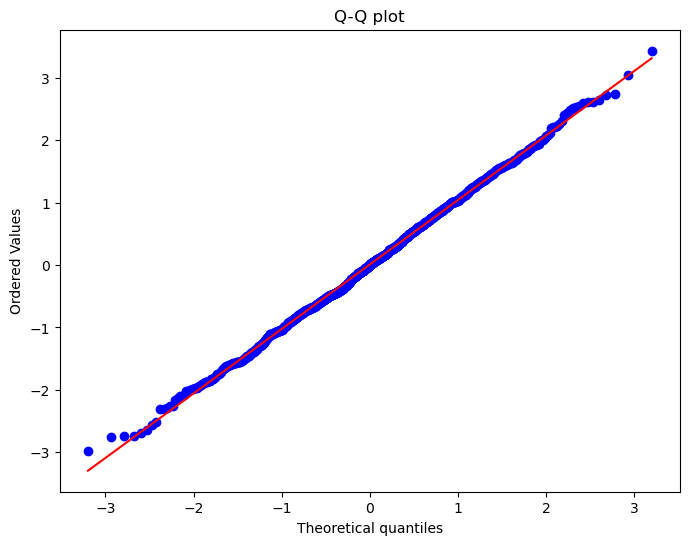

In [15]:
#This tells if we had normal distribution or not if the p value is less than 0.05 the null hypothesis is rejected 
#telling that the data is normally distributed
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
# Generate some example data (replace this with your actual data)
data = np.random.normal(loc=0, scale=1, size=1000)
# Shapiro-Wilk test for normality
stat, p = stats.shapiro(data)
print("Shapiro-Wilk test p-value:", p)
# Visualization: Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q plot')
plt.xlabel('Theoretical quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [16]:
from sklearn.impute import SimpleImputer
# Impute missing values for numerical features using mean
numerical_features = df.select_dtypes(include=['float64']).columns
imputer = SimpleImputer(strategy='mean')  # Use 'mean' for mean imputation
df[numerical_features] = imputer.fit_transform(df[numerical_features])

In [17]:
df.isnull().sum()

Age                                       0
Sex                                       0
wearables                                 0
Duration                                  0
onlineplatforms                           0
Nature                                    0
screenillumination                        0
workingyears                              0
hoursspentdailycurricular                 0
hoursspentdailynoncurricular              0
Gadgetsused                               0
levelofgadjetwithrespecttoeyes            0
Distancekeptbetweeneyesandgadjet          0
Avgnighttimeusageperday                   0
Blinkingduringscreenusage                 0
Difficultyinfocusingafterusingscreens     0
freqquencyofcomplaints                    0
Severityofcomplaints                      0
RVIS                                      0
Ocularsymptomsobservedlately              0
Symptomsobservingatleasthalfofthetimes    0
frequencyofdryeyes                        0
Schimers1Lefteye                

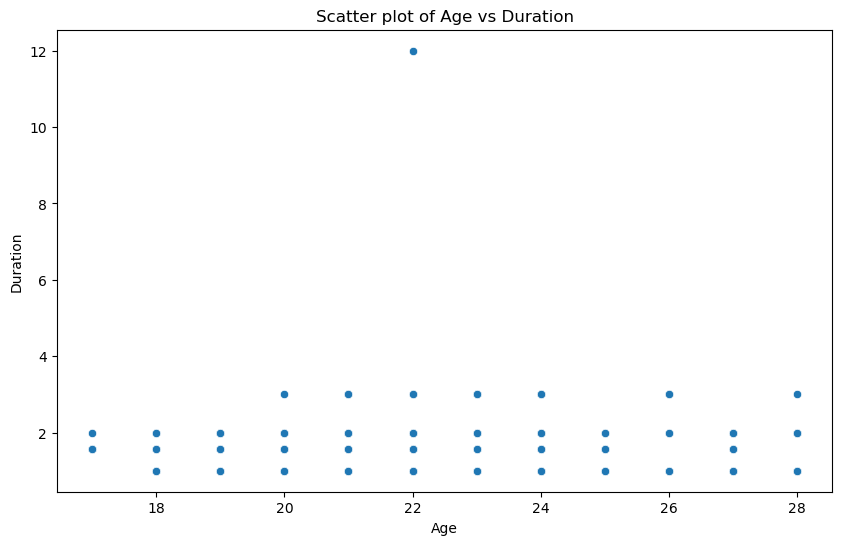

In [18]:
# Scatter plot for two numerical variables
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Duration', data=df)
plt.title('Scatter plot of Age vs Duration')
plt.xlabel('Age')
plt.ylabel('Duration')
plt.show()

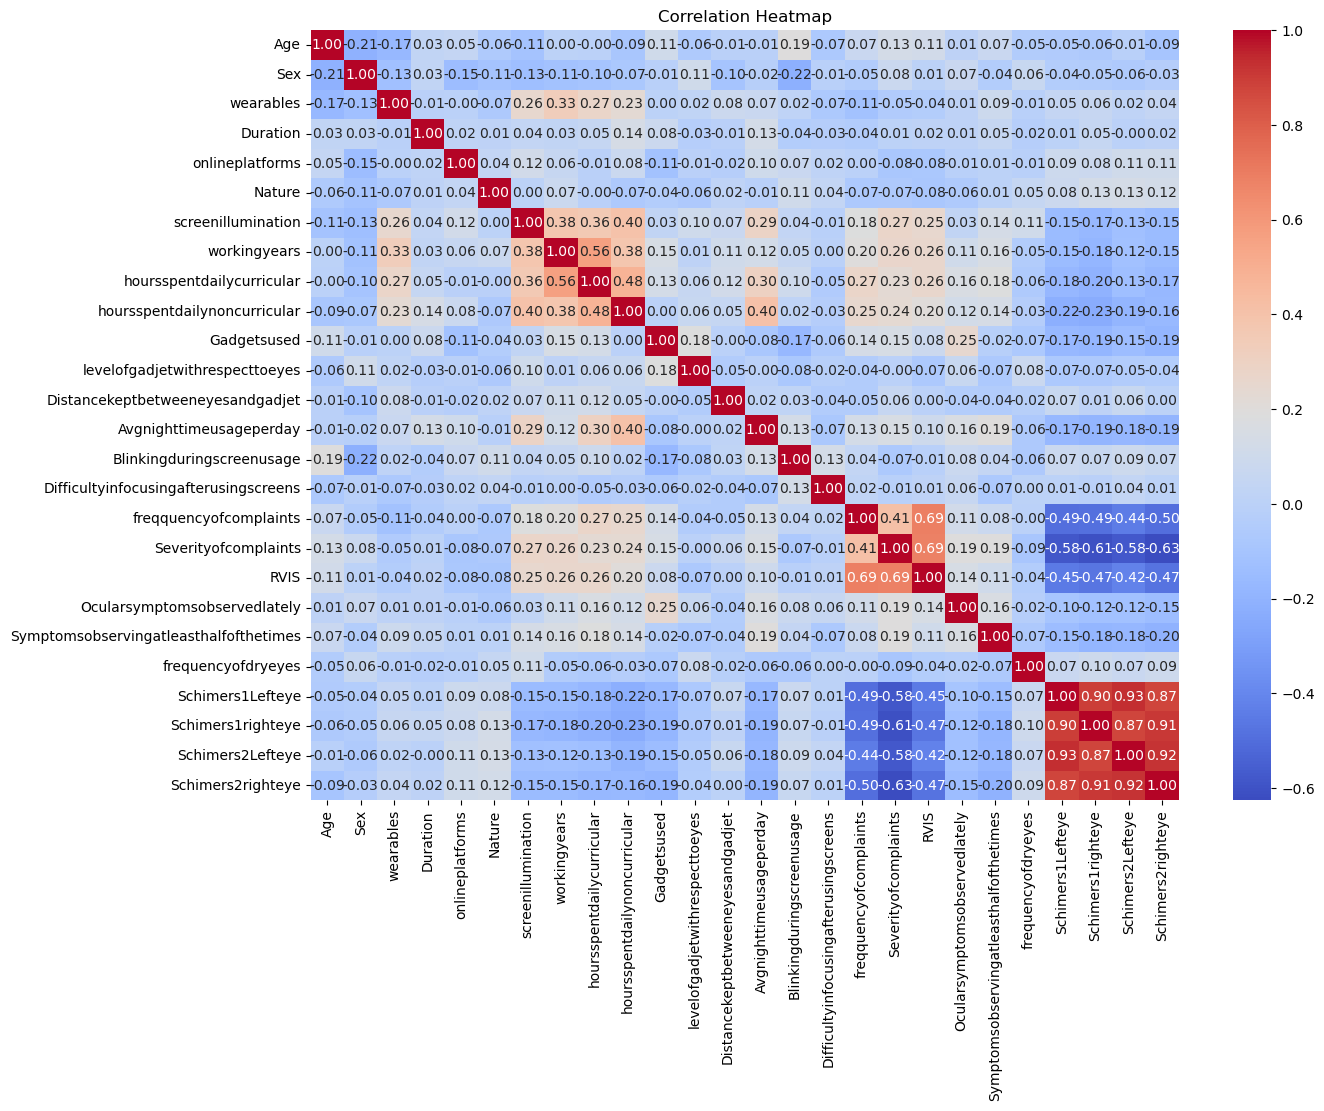

In [19]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
# Compute correlation matrix for numeric columns only
correlation_matrix = df[numeric_columns].corr()
# Correlation heatmap for numeric columns
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

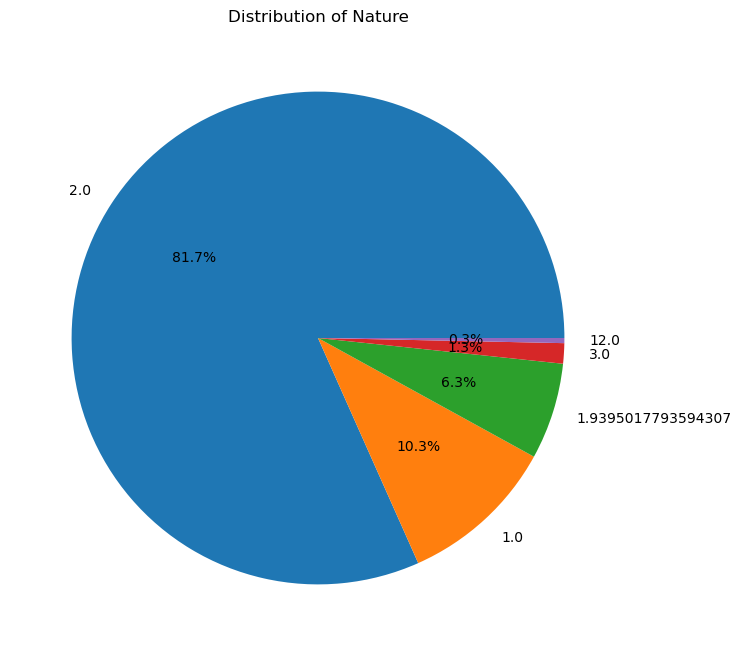

In [20]:
# Pie chart for categorical variable
plt.figure(figsize=(8, 8))
df['Nature'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Nature')
plt.ylabel('')
plt.show()

<Axes: xlabel='Sex', ylabel='count'>

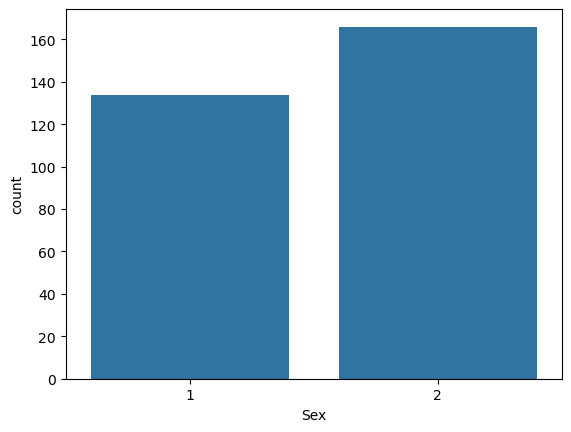

In [21]:
#  Explore gender distribution
sns.countplot(x='Sex', data=df)

<Axes: xlabel='Nature', ylabel='hoursspentdailynoncurricular'>

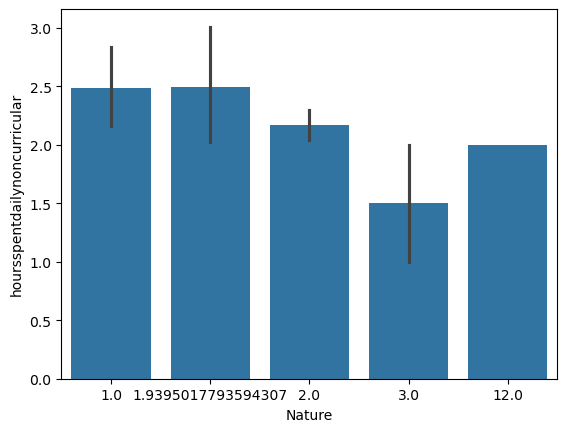

In [22]:
# Investigate screen usage by activity type
sns.barplot(x='Nature', y='hoursspentdailynoncurricular', data=df)

<Axes: xlabel='screenillumination', ylabel='frequencyofdryeyes'>

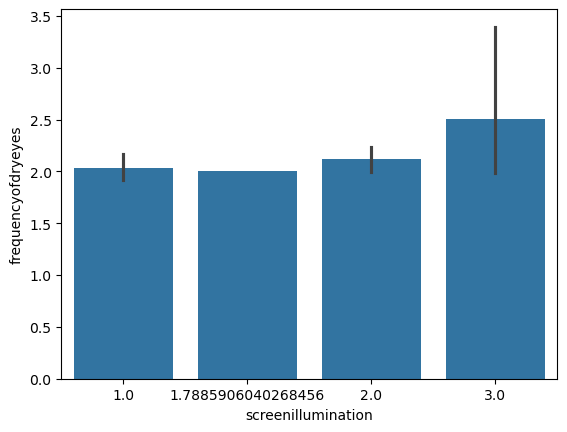

In [23]:
# Correlate screen illumination with dry eye complaints
sns.barplot(x='screenillumination', y='frequencyofdryeyes',data=df)

In [24]:
# Histograms for numerical variables
numerical_columns = ['Age', 'Duration', 'workingyears', 'hoursspentdailycurricular', 
                     'hoursspentdailynoncurricular', 'Avgnighttimeusageperday', 'Blinkingduringscreenusage', 
                     'Difficultyinfocusingafterusingscreens', 'freqquencyofcomplaints', 'Severityofcomplaints', 
                     'RVIS', 'frequencyofdryeyes', 'Schimers1Lefteye', 'Schimers1righteye', 
                     'Schimers2Lefteye', 'Schimers2righteye']
categorical_columns = ['Sex', 'wearables', 'onlineplatforms', 'Nature', 'Gadgetsused']

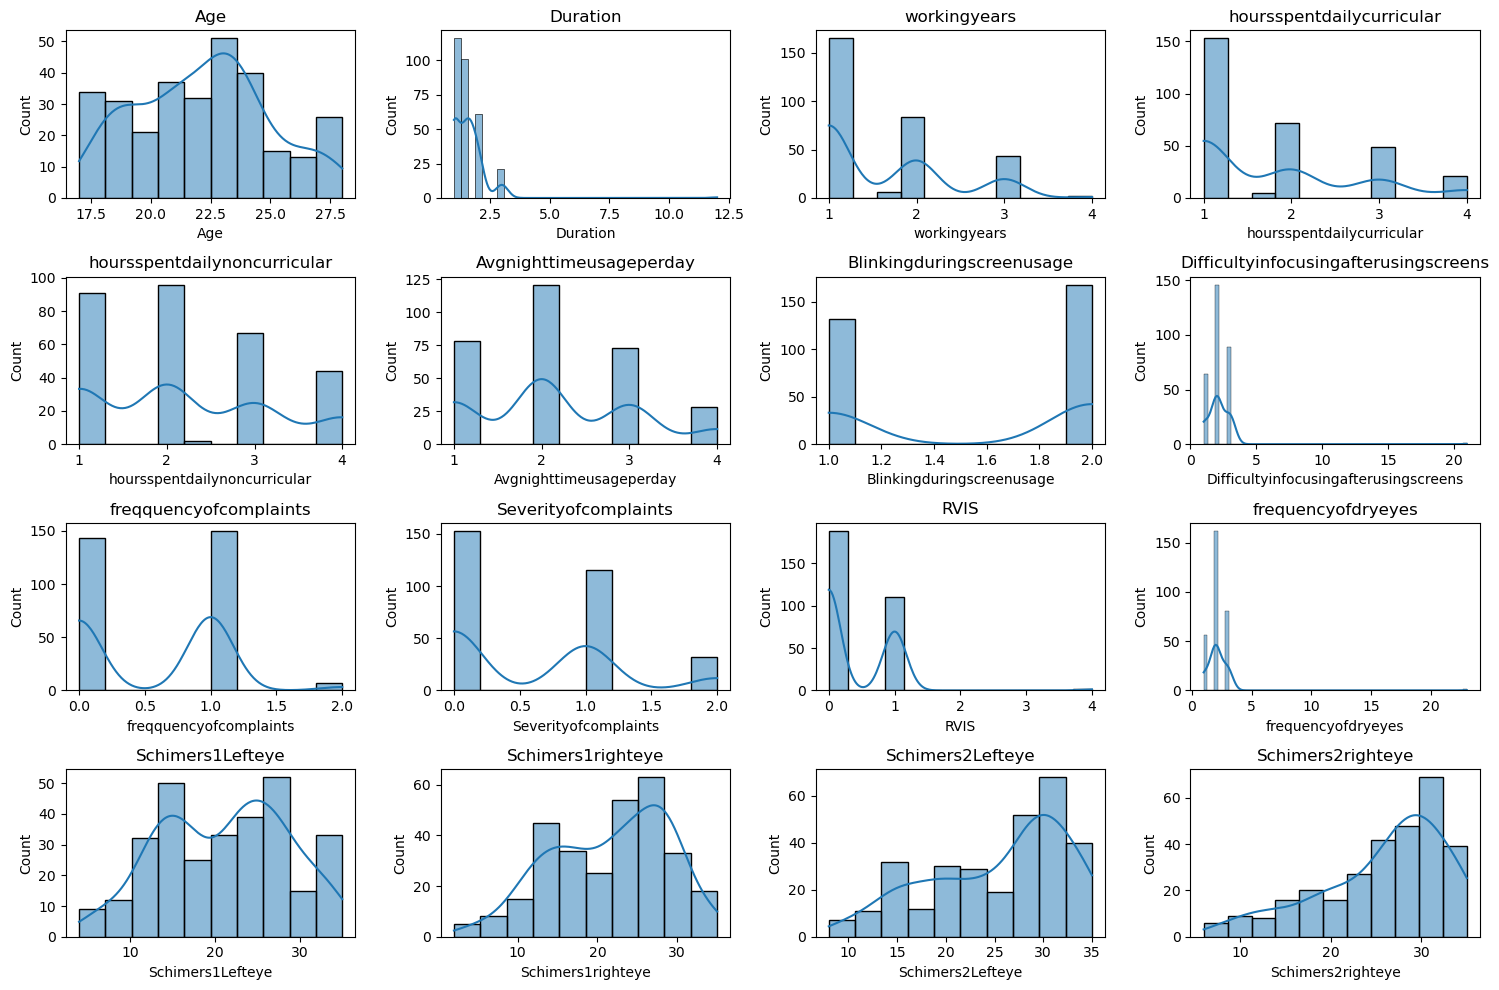

In [25]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[col], kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

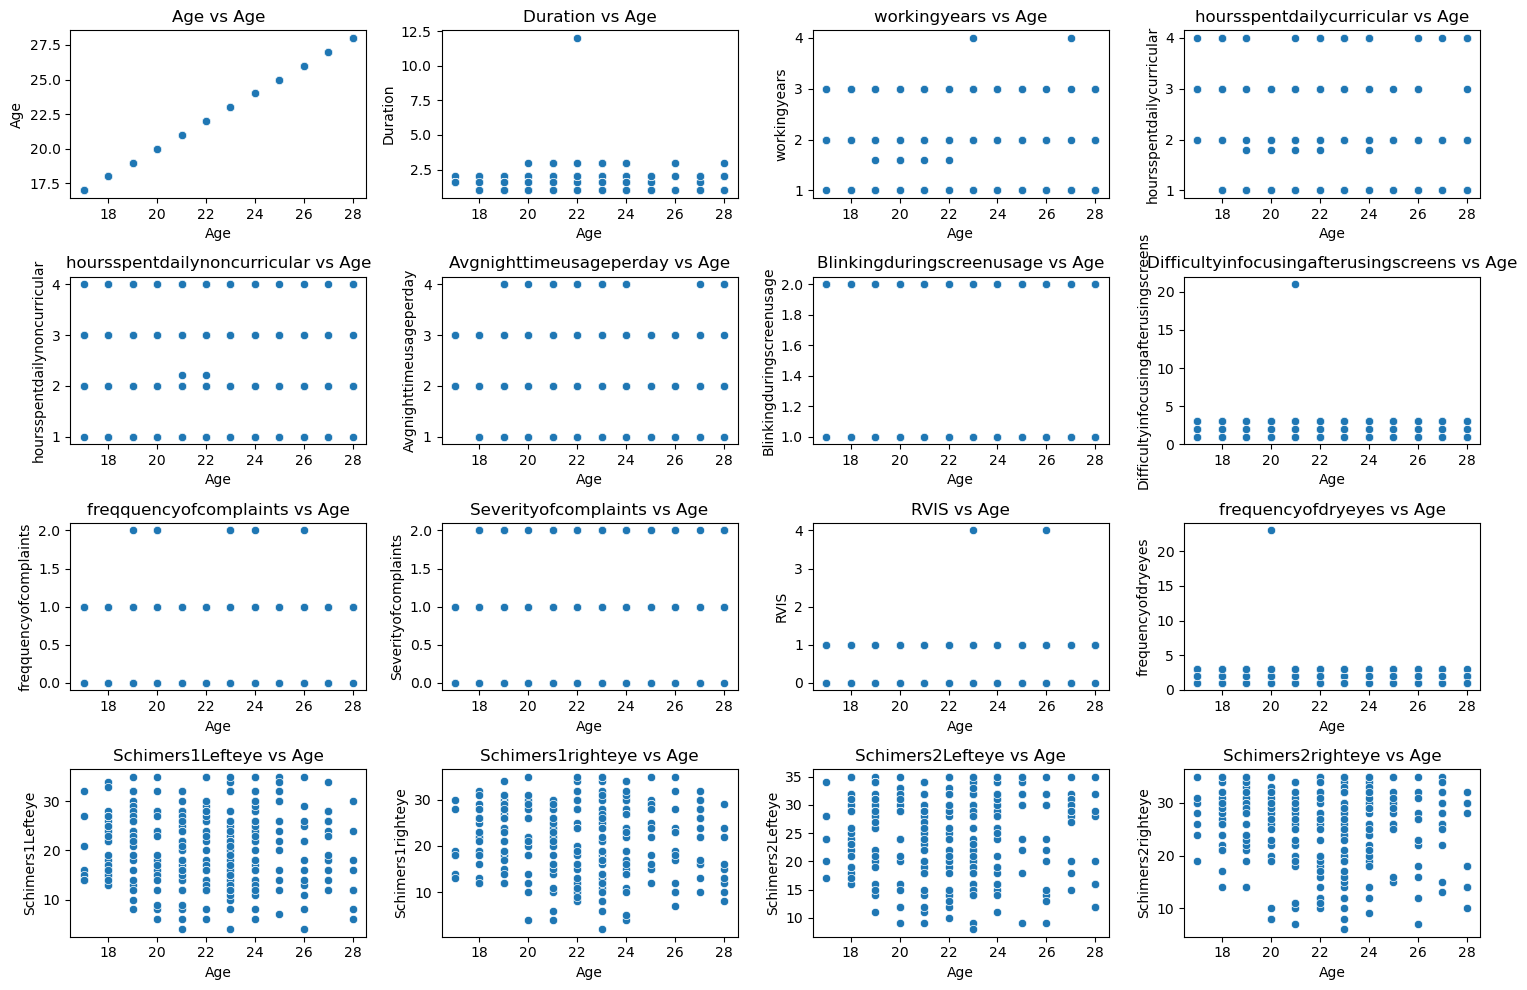

In [26]:
# Scatter plots for numerical variables against Age
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.scatterplot(data=df, x='Age', y=col)
    plt.title(f'{col} vs Age')
plt.tight_layout()
plt.show()

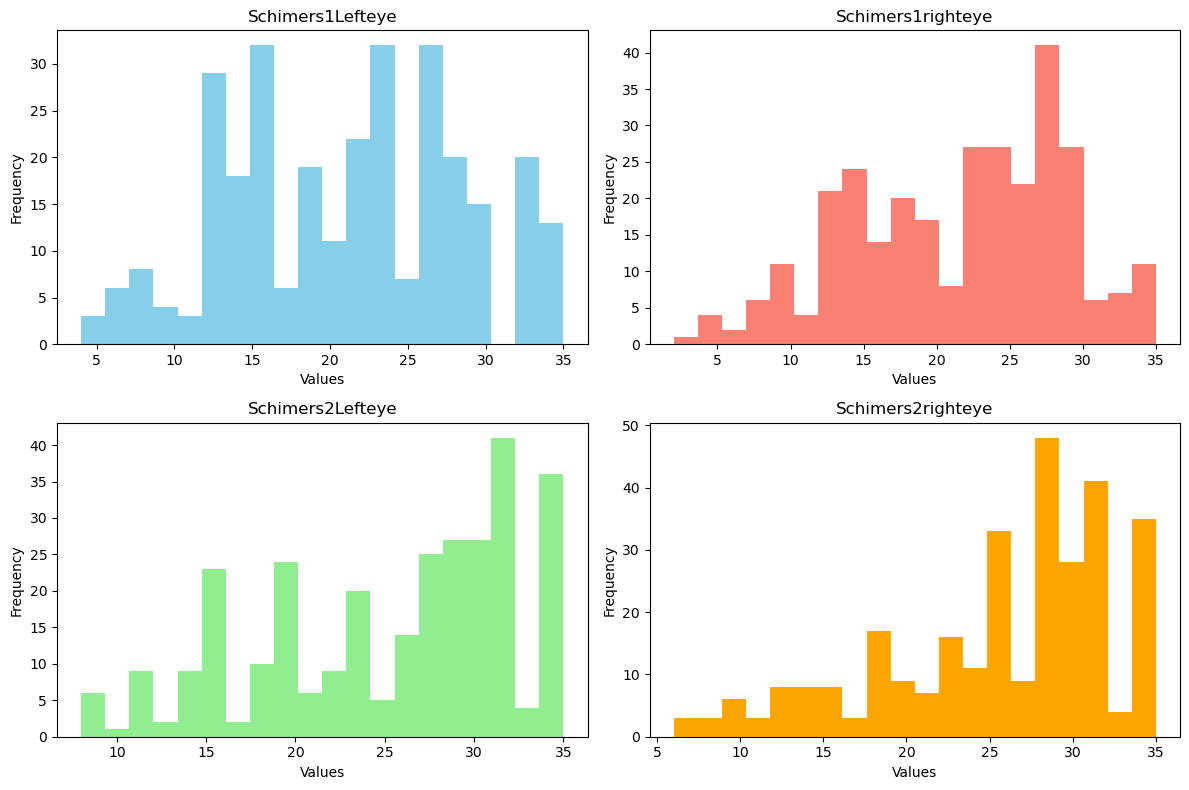

In [27]:
fig,axs = plt.subplots(2, 2, figsize=(12, 8))
axs[0, 0].hist(df['Schimers1Lefteye'], bins=20, color='skyblue')
axs[0, 0].set_title('Schimers1Lefteye')
axs[0, 0].set_xlabel('Values')
axs[0, 0].set_ylabel('Frequency')

axs[0, 1].hist(df['Schimers1righteye'], bins=20, color='salmon')
axs[0, 1].set_title('Schimers1righteye')
axs[0, 1].set_xlabel('Values')
axs[0, 1].set_ylabel('Frequency')

axs[1, 0].hist(df['Schimers2Lefteye'], bins=20, color='lightgreen')
axs[1, 0].set_title('Schimers2Lefteye')
axs[1, 0].set_xlabel('Values')
axs[1, 0].set_ylabel('Frequency')

axs[1, 1].hist(df['Schimers2righteye'], bins=20, color='orange')
axs[1, 1].set_title('Schimers2righteye')
axs[1, 1].set_xlabel('Values')
axs[1, 1].set_ylabel('Frequency')


plt.tight_layout()
plt.show()